I590 - Applied Data Science

Visualization using Python

Created by Vivek Vijayaraghavan

Date: 04/04/2019

Objective: Code Portfolio for Visualization using python

# Graphics and visualization

## Overview
There are two exclusive libraries in python for visualization, commonly known as matplotlib and seaborn.
 - Matplotlib: Python based plotting library offers matplotlib with a complete 2D support along with limited 3D graphic support. It is useful in producing publication quality figures in interactive environment across platforms. It can also be used for animations as well. To know more about this library, check this link.
 - Seaborn: Seaborn is a library for creating informative and attractive statistical graphics in python. This library is based on matplotlib. Seaborn offers various features such as built in themes, color palettes, functions and tools to visualize univariate, bivariate, linear regression, matrices of data, statistical time series etc which lets us to build complex visualizations. To know more about this library, check this link.



## Pre-Requsites

In [44]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import requests
import io
import random
random.random()
import datetime
import folium
import geocoder

from os import path
from matplotlib.pyplot import figure, show, rc
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import json
from tqdm import tqdm

# Set plotting options.
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## References
 - [Python Visualization](https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/)
 - [Matplotlib Documentation](http://matplotlib.org/)
 - [Matplotlib Beginners](http://matplotlib.org/users/beginner.html)
 - [Matplotlib Gallery](http://matplotlib.org/gallery.html)
 - [Matplotlib Screenshots](http://matplotlib.org/users/screenshots.html)

## Matplotlib
Matplotlib is the standard library commonly used to display graphics and plots in Python. The examples below come from the [Matplotlib Screenshots](http://matplotlib.org/users/screenshots.html) page. One of the options that you will need to remember to set when you use Matplotlib is "%matplotlib inline", which instructs the notebook to plot inline instead of opening a separate window for your graph.

## Simple Plots
The graph below does not contain any real significance other than demonstrating how easy it is to plot graphs.

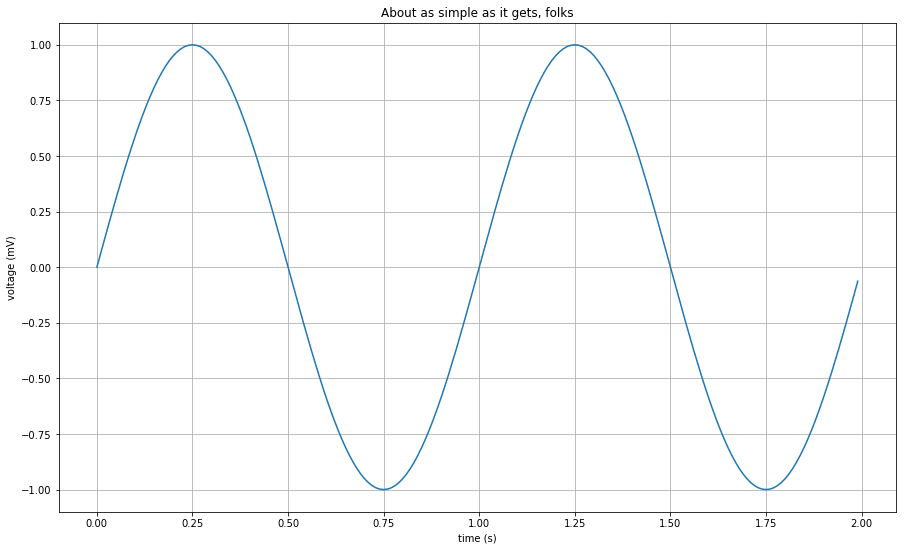

In [16]:
# Import matplotlib library and set notebook plotting options.
import matplotlib.pyplot as plt
import numpy as np
# Instruct the notebook to plot inline. 
%matplotlib inline     
plt.rcParams['figure.figsize'] = (15, 9) 
plt.rcParams['axes.titlesize'] = 'large'

# Generate data.
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

# Create plot.
plt.plot(t, s)

# Set plot options.
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)

# Saving as file can be achieved by uncommenting the line below.
# plt.savefig("test.png")

# Display the plot in the notebook.
# The '%matplotlib inline' option set earlier ensure that the plot is displayed inline.
plt.show()

## Sub Plots
"Subplots" is another useful feature where you can display multiple plots. This is typically used to visually compare data sets.

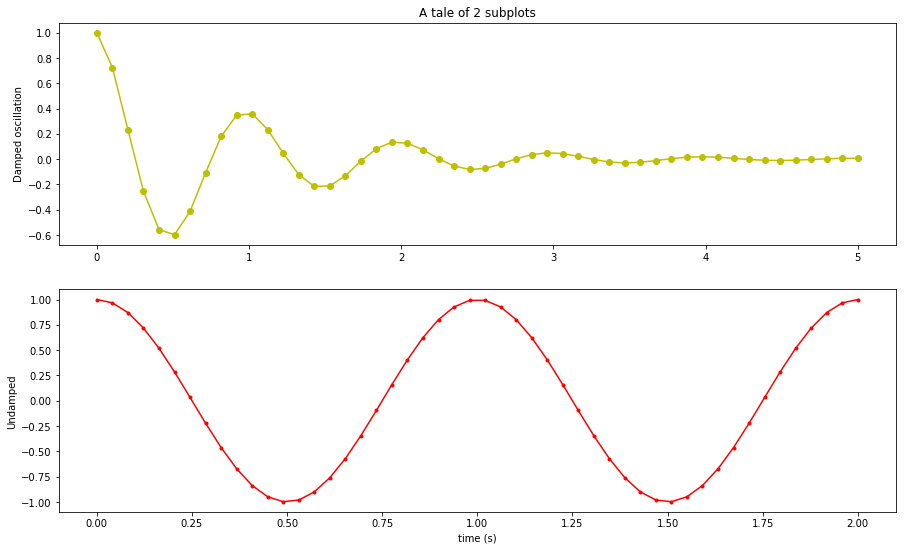

In [17]:
"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

# Types of Plots

## Histograms
Here is another example of a plot that will be utilized in future modules. The example demonstrates syntax, and provides ideas of what is possible.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


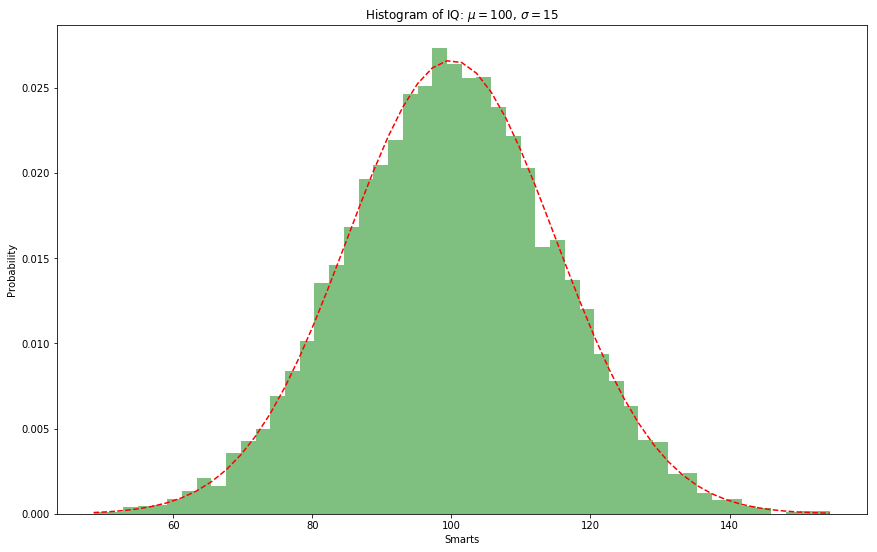

In [18]:
"""
Demo of the histogram (hist) function with a few features.

In addition to the basic histogram, this demo shows a few optional features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the integral of
      the histogram is 1. The resulting histogram is a probability density.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

"""
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Example data.
mu = 100  # Mean of distribution.
sigma = 15  # Standard deviation of distribution.
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# The histogram of the data.
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
# Add a 'best fit' line.
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel.
plt.subplots_adjust(left=0.15)
plt.show()

The example below visualizes the simulation of coin flips. Although you already have a fairly accurate idea of whether or not the coin is biased, in statistics, the typical approach requires sampling from the underlying distribution multiple times, and then plotting the sampling distribution. To this end, a handle is required on the actual value for the probability of landing heads between 0 and 1 (probability of landing tails will then be 1 minus that value), which can be generated using the "random()" method from the random module, that is the call "random.random()". In the case of a fair coin, designate as heads anytime the value generated is below 0.5, otherwise it is assigned as tails. An unfair coin can be simulated by adjusting this threshold; the closer the value is to 0 (and below 0.5) the less likely the chance of getting heads in multiple trials. This is an involved complex statistical procedure, and is captured here for illustrative purposes.

In the next code cell, we simulate flipping a fair coin by specifying the threshold as 0.5. You will flip the coin 10 times and note the number of times it falls heads in those trials. This is repeated 1000 times, from which a plot of the sampling distribution of the underlying distribution (known as the binomial distribution) is generated.

In [22]:
threshold = 0.5
ntrials = 10 # Flips per trial.
size = 1000 # Repetitions.
M = [0 for x in range(0,size)] 
for i in range(0,size):
    M[i] = sum([random.random()< threshold for x in range(0,ntrials)])

In [23]:
# Cross tabulation for frequency of occurence of values.
M_xtab = [0 for i in range(0, ntrials)]
for i in range(0,ntrials):
    M_xtab[i] = sum([x == i for x in M])

print(M_xtab)

[2, 7, 49, 104, 215, 245, 220, 102, 45, 9]


Text(0.5, 1.0, 'Coin flip distribution')

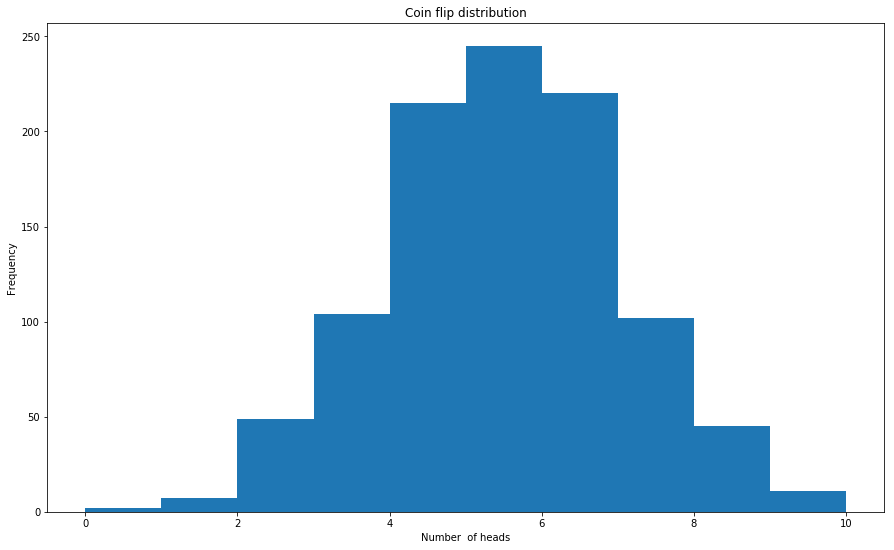

In [24]:
# The histogram of the data.
plt.hist(M, range=(0,ntrials),bins=ntrials)
plt.xlabel('Number  of heads')
plt.ylabel('Frequency')
plt.title('Coin flip distribution')

## Scatter Plots
The best way to help illustrate visualizing scatter plots is to use the iris dataset. We will start with a basic scatter plot and then graduate to visualizing the Petal and Sepal length and widths of iris dataset.

[]

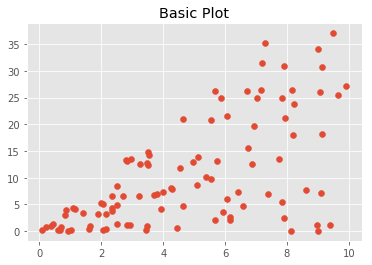

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

import numpy as np

x = np.random.rand(100) * 10
y = x * np.random.rand(100) * 5
plt.scatter(x, y)
plt.title("Basic Plot")
plt.plot()

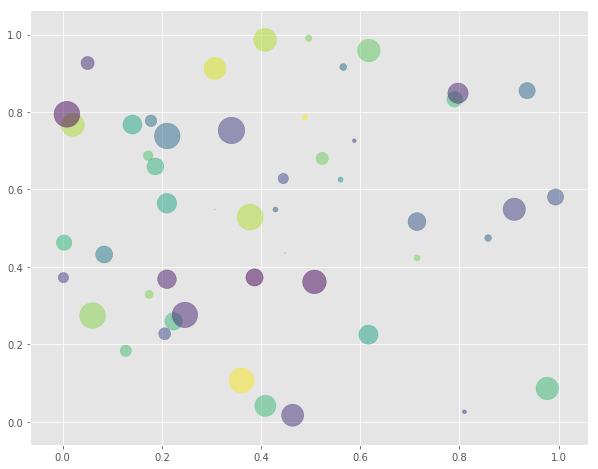

In [34]:
# Another basic scatterplot. This time to highlight the ability to change shape, size and color of the points.
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5) # Change color and transparency
plt.show()

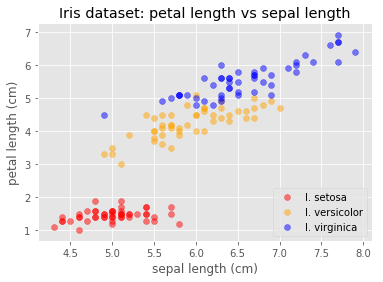

In [30]:
from sklearn import datasets
import pandas as pd

# Load some data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

colors = ['red', 'orange', 'blue']
species = ['I. setosa', 'I. versicolor', 'I. virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
    plt.scatter(        
        species_df['sepal length (cm)'],        
        species_df['petal length (cm)'],
        color=colors[i],        
        alpha=0.5,        
        label=species[i]   
    )

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Iris dataset: petal length vs sepal length')
plt.legend(loc='lower right')

plt.show()

## Polar Plot

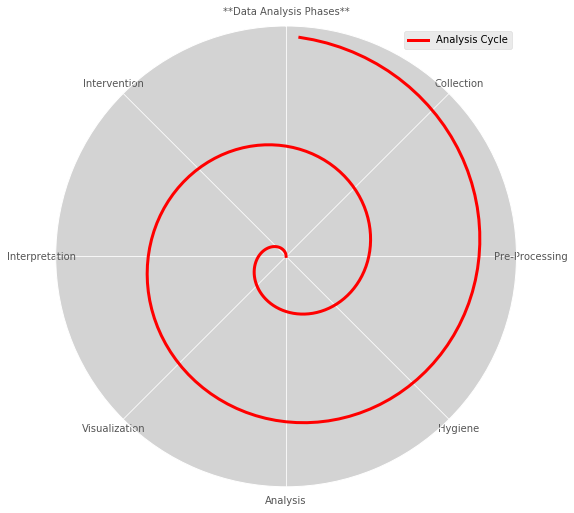

In [33]:
# Generate input data.

# Numpy array with minimum, maximum and increment specified.
# Change the maximum from 2.0 to 4.0 to simulate a longer analytic journey.
r = np.arange(0, 2.0, 0.01) 

# Utilize Numpy constant Pi.
theta = 2*np.pi*r

# Set plotting options and plot.
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection='polar', facecolor='#d3d3d3')
ax.plot(theta, r, color='r', lw=3, label='Analysis Cycle')
ax.set_xticklabels(['**Data Analysis Phases**', 'Intervention', 'Interpretation', 'Visualization', 'Analysis', 'Hygiene', 'Pre-Processing', 'Collection'])
ax.set_theta_zero_location('N')
ax.axes.get_yaxis().set_ticks([])
ax.legend()
show()

## Data Density Visualization

In [35]:
# Create Pandas date range with starting date, number of periods and frequency as input arguments.
r1 = pd.date_range('2014/01/01', periods=12, freq='M')
r2 = pd.date_range('2015/01/01', periods=365, freq='D')
r3 = pd.date_range('2015/01/01', periods=365, freq='D')
r4 = pd.date_range('2015/01/01', periods=365, freq='D')
r5 = pd.date_range('2016/01/01', periods=6, freq='M')

# Create a list containing all the date ranges.
r = r1.append(r2).append(r3).append(r4).append(r5)

# Convert the list to a series with random values using the Numpy random function indexed by date.
ts = pd.Series(np.random.randn(len(r)), index=r)

# Display the head of the series.
ts.head()

2014-01-31   -0.410813
2014-02-28    0.215570
2014-03-31   -0.811242
2014-04-30    0.062674
2014-05-31   -0.001720
dtype: float64

In [36]:
# Display the type of the variable.
type(ts)

pandas.core.series.Series

In [37]:
# Show summary statistics of numeric data.
ts.describe()

count    1113.000000
mean       -0.012832
std         0.995655
min        -3.847457
25%        -0.687837
50%        -0.021225
75%         0.681042
max         2.970915
dtype: float64

In [38]:
# Return the min and max date.
print(ts.index.min())
print(ts.index.max())

2014-01-31 00:00:00
2016-06-30 00:00:00


In some cases, the minimum and maximum values do not tell you the full story, and you may need to dig a bit deeper to better understand the data set. In the generated data set, there is a difference in granularity, with more frequent observations during 2015 than in 2014 and 2016.

Depending on the type of analysis you are performing, you may choose to:
 - Work with the data set as is;
 - Work with a subset of the data; or
 - Resample the data (advanced).

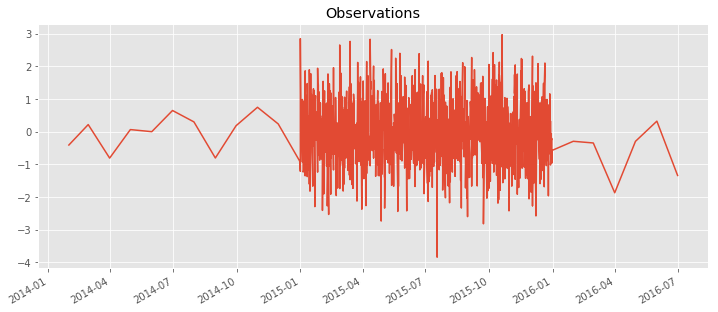

In [39]:
# Review the date distribution of the data graphically.
ts.plot(title="Observations",figsize=[12,5])

In [40]:
# Create a new data frame, tsc, containing the subset of 2015 data and print the minimum and maximum values.
tsc = ts.loc['2015-1-1':'2015-12-31']
print(tsc.index.min())
print(tsc.index.max())

2015-01-01 00:00:00
2015-12-31 00:00:00


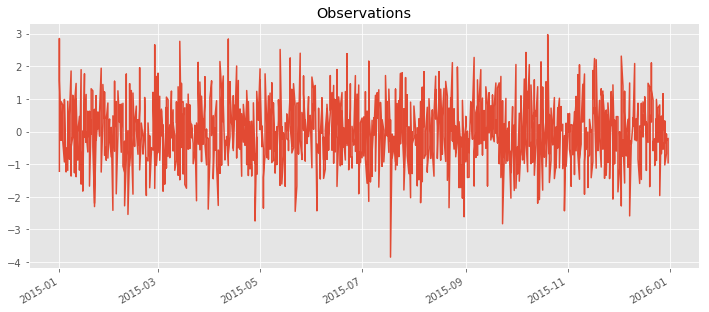

In [41]:
# Plot the new dataset.
tsc.plot(title="Observations",figsize=[12,5])

## Geocoding

Geocoding is the process of transforming a description of a location into a spatial (physical) location on the earth’s surface. You can geocode by entering one location’s description at a time or by simultaneously providing multiple descriptions in a table.

There are several geocoding libraries and services available. Here, we demonstrate the use of the Geocoder Python library, using Google Maps as the provider.

Start by geocoding a single city and country combination. You can change the values of the city, should you wish to do so.

In [45]:
# Let's geocode a city in the format of the data set that we have available.
g = geocoder.google('Sydney, Australia')

# Print the latitude and longitude for the city.
g.latlng

In [46]:
# Find your location based on your IP address.
mylocation = geocoder.ip('me')

# Print your location.
mylocation.latlng

[32.844, -97.1431]

In [47]:
# What city am I located...
mylocation.city

'Bedford'

To highlight geocoding visualization, we will be using student data (with no sensitive information in teh content). The visualization will explain where the students are from (geographic location) to have enrolled in a specific program.

In [49]:
# Load student location data and display the header.
df1 = pd.read_csv('./data/grouped_geocoded.csv',index_col=0)
# Let's look at the dataframe again to see the populated values for latitude and longitude.
df1.head()

,country,city,industry,student_count,geocode_input,lat,long
0,Australia,Adelaide,Other or Unknown,1,"Adelaide, Australia",-34.928499,138.600746
1,Australia,Bronte,Other or Unknown,1,"Bronte, Australia",-33.905320,151.260690
2,Australia,Buddina,ICT,1,"Buddina, Australia",-26.690000,153.134000
3,Australia,Carlingford,ICT,1,"Carlingford, Australia",-33.777000,151.048000
4,Australia,Glen Waverley,ICT,1,"Glen Waverley, Australia",-37.885652,145.165179


Plotting the geocoded data onto the map

In [50]:
# Set map center and zoom level.
mapc = [0, 30]
zoom = 2

# Create map object.
map_osm = folium.Map(location=mapc,
                    zoom_start=zoom)

# Plot your server location.
folium.CircleMarker(mylocation.latlng,
                    radius=50,
                    popup='My Server Location',
                    fill_color='red'
                   ).add_to(map_osm)

# Plot each of the locations that you geocoded.
for j in range(len(df1)):
    folium.Marker([df1.ix[j,'lat'], df1.ix[j,'long']],
        icon=folium.Icon(color='green',icon='info-sign')
        ).add_to(map_osm)

# Show the map.
map_osm

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
